In [1]:
from gbi.ABC import ABC
import torch

/home/michael/anaconda3/envs/gbi/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [118]:
from gbi.benchmark.tasks.uniform_1d.task import UniformNoise1D
import pickle
from sbi.utils.metrics import c2st
import numpy as np
import matplotlib.pyplot as plt

In [119]:
with open("../gbi/benchmark/tasks/uniform_1d/xo.pkl", "rb") as handle:
    x_os = pickle.load(handle)

In [187]:
beta = 100.0
xo_ind = 1

In [188]:
x_o = x_os[xo_ind:xo_ind+1]

In [189]:
task = UniformNoise1D(beta=beta, x_o=x_o)

In [190]:
theta = task.prior.sample((200_000,))
x = task.simulate(theta)

In [191]:
inference = ABC()

In [192]:
inference.append_simulations(theta, x)

In [193]:
def mse(x, x_o):
    return torch.mean((x - x_o)**2, dim=1)

In [194]:
samples = inference.sample(mse, beta=beta, x=x_o)

In [195]:
samples.shape

torch.Size([41489, 1])

In [196]:
samples_cut = samples[:10_000]

In [197]:
with open(f"../results/benchmark/ground_truths/uniform_1d/2023_01_19__09_44_22/beta_{int(beta)}.0/obs_{xo_ind}/rejection_samples.pkl", "rb") as handle:
    gt_samples = pickle.load(handle)

### Plot histograms

In [200]:
hist_gt, bins_gt = np.histogram(gt_samples.numpy(), bins=30, range=(-1.5, 1.5))
hist_estimate, bins_estimate = np.histogram(samples_cut.numpy(), bins=30, range=(-1.5, 1.5))

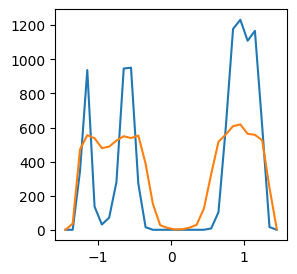

In [201]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
_ = ax.plot(bins_gt[:-1] + 0.5 * (bins_gt[1] - bins_gt[0]), hist_gt)
_ = ax.plot(bins_estimate[:-1] + 0.5 * (bins_estimate[1] - bins_estimate[0]), hist_estimate)

### Compute c2st

In [113]:
c2st_val = c2st(samples_cut, gt_samples)

In [114]:
gt_samples.shape

torch.Size([10000, 1])

In [115]:
samples_cut.shape

torch.Size([10000, 1])

In [116]:
print(c2st_val)

tensor([0.4271])
